<a href="https://colab.research.google.com/github/Tavleen1203/SarcasmDetection_NLP/blob/main/RandomForest_XBGoost_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA BALANCING USING ADASYN

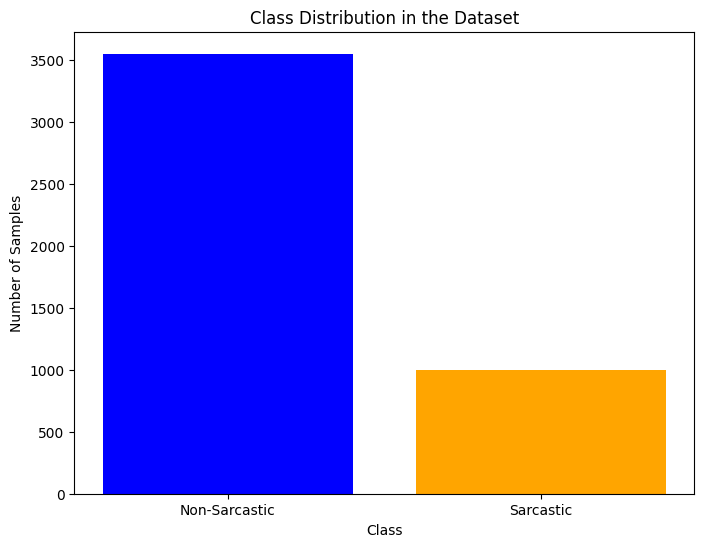

0    3553
1    1000
Name: Label, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Count the number of samples in each class
class_counts = data['Label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xticks(class_counts.index, ['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

print(class_counts)


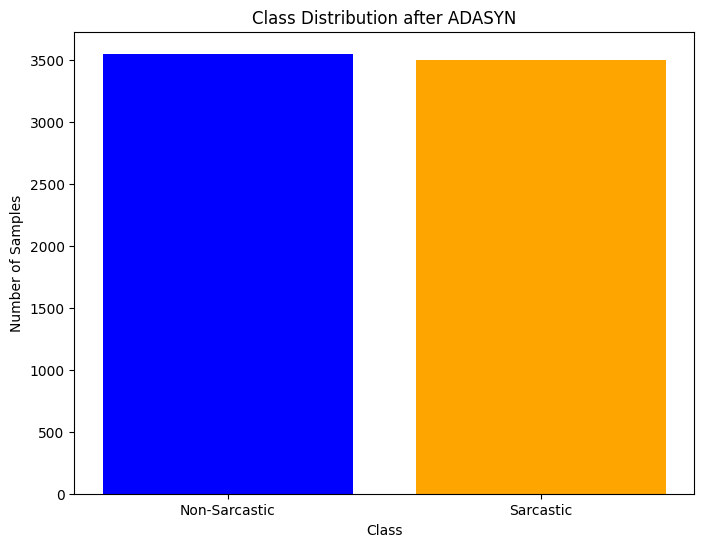

0    3553
1    3506
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Ensure that the labels are correctly encoded (0 for Non-Sarcastic, 1 for Sarcastic)
data['Label'] = data['Label'].map({0: 0, 1: 1})

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(tweets)

# Apply ADASYN to balance the class distribution based on the TF-IDF features
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_tfidf, labels)

# Count the number of samples in each class after ADASYN
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Plot the class distribution after ADASYN
plt.figure(figsize=(8, 6))
plt.bar(class_counts_resampled.index, class_counts_resampled.values, color=['blue', 'orange'])
plt.xticks(class_counts_resampled.index, ['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after ADASYN')
plt.show()

print(class_counts_resampled)



BAGGING MODEL

Ensemble Accuracy: 0.93


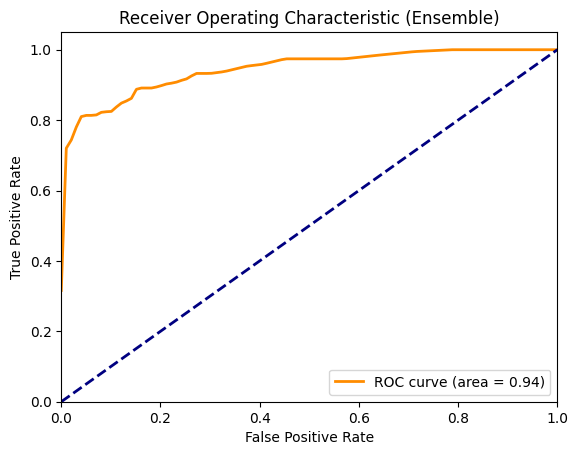

Ensemble Precision: 0.94
Ensemble Recall: 0.72
Ensemble F1-Score: 0.82


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, accuracy_score,
                             precision_score, recall_score, f1_score)

# Load your dataset
# Modify the file path as needed
data = pd.read_csv('/content/Sarcasm_Kaggle_1.csv')

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Tweet'], data['Label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Number of base models (Random Forest classifiers)
num_base_models = 10  # You can adjust this number

# Initialize a list to store the base models
base_models = []

# Initialize lists to store predictions and ROC curves
all_predictions = []
roc_curves = []

# Initialize lists to store precision, recall, and F1-score
precisions = []
recalls = []
f1_scores = []

# Implement bagging
for i in range(num_base_models):
    # Initialize and train a Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test_tfidf)

    # Store the predictions for later aggregation
    all_predictions.append(y_pred)

    # Calculate and store the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_tfidf)[:, 1])
    roc_curves.append((fpr, tpr))

    # Calculate and store precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Aggregate predictions (for classification, you can use majority voting)
ensemble_predictions = np.mean(all_predictions, axis=0).round()

# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")

# Generate and plot ROC curve for the ensemble
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in roc_curves], axis=0)
roc_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Ensemble)')
plt.legend(loc="lower right")
plt.show()

# Calculate and print precision, recall, and F1-score for the ensemble
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)
print(f"Ensemble Precision: {ensemble_precision:.2f}")
print(f"Ensemble Recall: {ensemble_recall:.2f}")
print(f"Ensemble F1-Score: {ensemble_f1:.2f}")


BOOSTING MODEL

Accuracy: 0.93
Confusion Matrix:
[[697  21]
 [ 46 147]]
Classification Report:
               precision    recall  f1-score   support

Non-Sarcastic       0.94      0.97      0.95       718
    Sarcastic       0.88      0.76      0.81       193

     accuracy                           0.93       911
    macro avg       0.91      0.87      0.88       911
 weighted avg       0.92      0.93      0.92       911



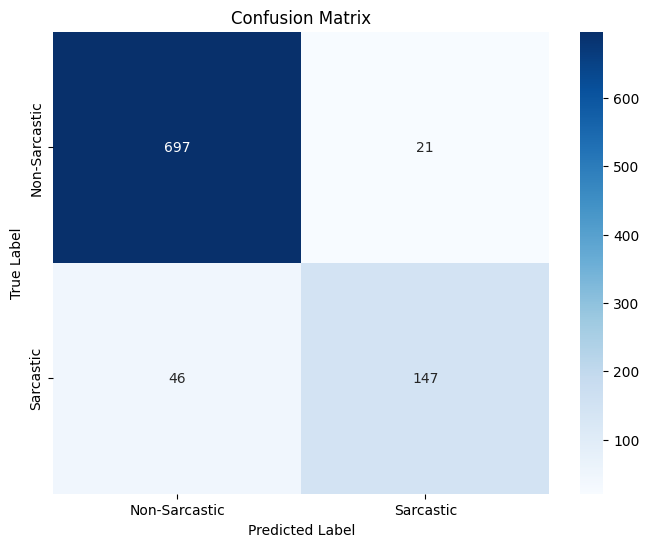

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# Split data into train and test sets
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_tweets)
X_test = vectorizer.transform(test_tweets)

# Train XGBoost classifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train, train_labels)

# Predictions
y_pred = classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(test_labels, y_pred)
conf_matrix = confusion_matrix(test_labels, y_pred)
class_report = classification_report(test_labels, y_pred, target_names=["Non-Sarcastic", "Sarcastic"])

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Sarcastic", "Sarcastic"],
            yticklabels=["Non-Sarcastic", "Sarcastic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


TRANSFORMER

Epoch 1/10
46/46 [==============================] - 10s 161ms/step - loss: 0.5482 - accuracy: 0.7638 - val_loss: 0.3943 - val_accuracy: 0.8011
Epoch 2/10
46/46 [==============================] - 8s 181ms/step - loss: 0.2699 - accuracy: 0.8905 - val_loss: 0.2468 - val_accuracy: 0.9012
Epoch 3/10
46/46 [==============================] - 8s 184ms/step - loss: 0.1202 - accuracy: 0.9602 - val_loss: 0.2363 - val_accuracy: 0.9177
Epoch 4/10
46/46 [==============================] - 7s 148ms/step - loss: 0.0619 - accuracy: 0.9794 - val_loss: 0.2564 - val_accuracy: 0.9150
Epoch 5/10
46/46 [==============================] - 8s 183ms/step - loss: 0.0366 - accuracy: 0.9900 - val_loss: 0.2821 - val_accuracy: 0.9191
Epoch 6/10
46/46 [==============================] - 7s 149ms/step - loss: 0.0241 - accuracy: 0.9949 - val_loss: 0.3414 - val_accuracy: 0.9163
Epoch 7/10
46/46 [==============================] - 8s 181ms/step - loss: 0.0154 - accuracy: 0.9959 - val_loss: 0.3066 - val_accuracy: 0.9163
Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

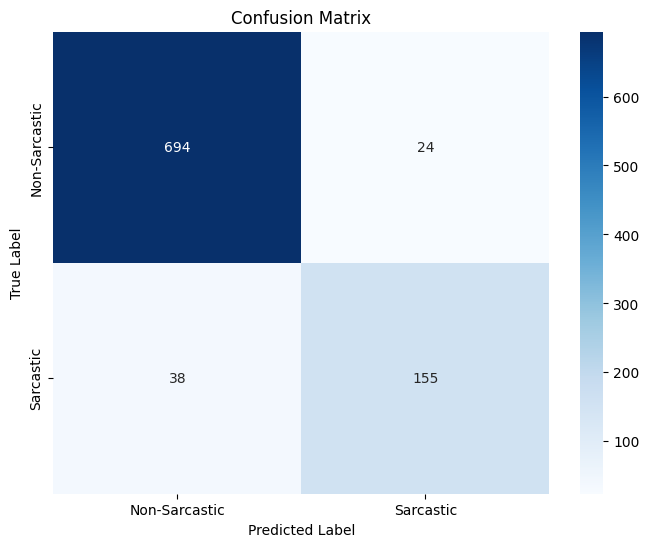

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Added for heatmap
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Ensure that the labels are correctly encoded (0 for Non-Sarcastic, 1 for Sarcastic)
data['Label'] = data['Label'].map({0: 0, 1: 1})

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_sequence_length = 100  # You can adjust this based on your dataset
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Build an LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Plot the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Sarcastic", "Sarcastic"],
            yticklabels=["Non-Sarcastic", "Sarcastic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show

